In [109]:
#Linear regression with multiple feature
import numpy as np
#area,bedroom,washroom
house = np.array([[1.1,2,2],[1.2,2,2],[1.5,2,3],[1.6,3,4],[2.0,4,4],[2.2,4,5],[2.5,4,5]])
price = np.array([110,130,160,180,220,240,280])

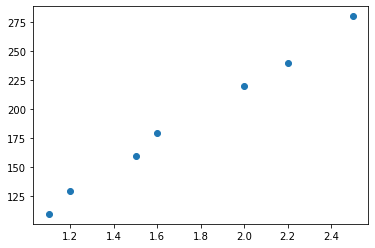

In [110]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(house[:,0],price)

In [111]:
#mean squared error function
def cost_function(x,y,w,b):
    ts_count = x.shape[0]
    cost = 0
    for i in range(ts_count):
        err = np.dot(x[i],w) + b - y[i]
        err = err ** 2
        cost += err
    return 1 / (2 * ts_count) * cost

In [112]:
cost_function(house,price,[10,20,30],100)

4698.214285714285

In [113]:
# gradient descend
def gradient_descent(x,y,w,b):
    ts_count = x.shape[0]
    dw = np.zeros(w.shape[0])
    db = 0
    for i in range(ts_count):
        err = np.dot(x[i], w) + b - y[i]
        dw += err * x[i]
        db += err
    return (dw/ts_count,db/ts_count)        

In [114]:
gradient_descent(house,price,np.array([10,20,30]),20)

(array([26.92857143, 50.28571429, 60.        ]), 15.857142857142858)

In [115]:
def train(x,y,w,b,alpha,itr):
    cost_history = []
    for i in range(itr):
        cost_history.append(cost_function(x,y,w,b))
        dw , db = gradient_descent(x,y,w,b)
        w -= alpha * dw
        b -= alpha * db
    print(f"Final value after iteration {itr} -> w_final =  {w} , b_final = {b} ")
    return (w,b)

In [116]:
alpha = 0.021
itr = 9500 #after this learning is to slow 
w = np.array([0.0,0.0,0.0])
b = 0
w_final , b_final = train(house, price, w, b, alpha, itr)

Final value after iteration 9500 -> w_final =  [106.61420753   0.42388688   3.98868351] , b_final = -11.215286907464822 


In [117]:
p_price = np.array([1.9,4,3])
predict_price = np.dot(p_price,w_final) + b_final
predict_price

205.01330544867136